In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Definimos el dataframe a partir del archivo csv que obtuvimos mediante webscrapping:

In [247]:
df_games = pd.read_csv("datos_metacritic.csv")
df_games

,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,The Legend of Zelda: Ocarina of Time,99,9.1,Nintendo 64,Nintendo,"Nov 23, 1998",Action Adventure,"As a young boy, Link is tricked by Ganondorf, ...",1 Player,E
1,Tony Hawk's Pro Skater 2,98,7.4,PlayStation,Activision,"Sep 20, 2000",Sports,As most major publishers' development efforts ...,1-2,T
2,Grand Theft Auto IV,98,7.8,PlayStation 3,Rockstar Games,"Apr 29, 2008",Action Adventure,[Metacritic's 2008 PS3 Game of the Year; Also ...,1 Player,M
3,SoulCalibur,98,8.4,Dreamcast,Namco,"Sep 8, 1999",Action,"This is a tale of souls and swords, transcendi...",1-2,T
4,Grand Theft Auto IV,98,8.0,Xbox 360,Rockstar Games,"Apr 29, 2008",Action Adventure,[Metacritic's 2008 Xbox 360 Game of the Year; ...,1 Player,M
...,...,...,...,...,...,...,...,...,...,...
9937,Vroom in the Night Sky,17,3.2,Switch,Poisoft,"Apr 5, 2017",Sports,Vroom in the night sky is a magical bike actio...,No Online Multiplayer,E
9938,Leisure Suit Larry: Box Office Bust,17,1.9,PlayStation 3,Funsta,"May 5, 2009",Action Adventure,The Leisure Suit Larry: Box Office Bust video ...,No Online Multiplayer,M
9939,Yaris,17,4.4,Xbox 360,Backbone Entertainment,"Oct 10, 2007",Driving,[Xbox Live Arcade] Hop into a Toyota Yaris an...,2 Online,E10+
9940,Ride to Hell: Retribution,16,1.4,PC,Deep Silver,"Jun 24, 2013",Driving,The game is set in the last years of the roari...,2 Online,M


In [248]:
df_games = df_games[df_games["Fecha"]!= "TBA - Early Access"] #eliminamos valor erroneo de fecha
df_games = df_games[df_games["Rating_Meta"]!= 'tbd'] #Valores no utiles en el analisis
df_games = df_games[df_games["Rating_Usuarios"]!= 'tbd']

Definimos el segundo dataframe a utilizar:

sales = unidades vendidas en millones

In [249]:
df_sales = pd.read_csv("vgsales.csv")
df_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Unimos los dataframes por los nombres de los videojuegos y filtramos las columnas repetidas

In [250]:
df_rank_sales = df_sales.merge(df_games, left_on="Name", right_on="Nombre", how="inner")
df_rank_sales.drop(columns=["Rank", "Name", "Platform", "Genre", "Publisher"], inplace=True)
df_rank_sales.drop_duplicates(inplace=True)
df_rank_sales.dropna(inplace=True)
df_rank_sales

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,2009.0,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort,80,8.3,Wii,Nintendo,"Jul 26, 2009",Sports,Wii Sports Resort is a collection of fun sport...,No Online Multiplayer,E
1,1989.0,23.20,2.26,4.22,0.58,30.26,Tetris,80,7.3,PlayStation 3,Electronic Arts,"Jan 4, 2011",Miscellaneous,The first Tetris game for the PlayStation 3 wi...,4 Online,E
2,1988.0,2.97,0.69,1.81,0.11,5.58,Tetris,80,7.3,PlayStation 3,Electronic Arts,"Jan 4, 2011",Miscellaneous,The first Tetris game for the PlayStation 3 wi...,4 Online,E
3,2005.0,9.81,7.57,4.13,1.92,23.42,Mario Kart DS,91,8.7,DS,Nintendo,"Nov 14, 2005",Driving,Race and battle with up to eight karts at once...,No Online Multiplayer,E
4,2007.0,8.94,8.03,3.60,2.15,22.72,Wii Fit,80,7.7,Wii,Nintendo,"May 19, 2008",Sports,The active-play phenomenon started by Wii Spor...,1 Player,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8874,2009.0,0.00,0.01,0.00,0.00,0.01,Spore Galactic Adventures,70,7.3,PC,Electronic Arts,"Aug 27, 2008",Strategy,Spore Galactic Adventures adds variety and dep...,No Online Multiplayer,E10+
8875,2002.0,0.01,0.00,0.00,0.00,0.01,Super Robot Taisen: Original Generation,72,6.7,Game Boy Advance,Atlus Co.,"Aug 8, 2006",Strategy,Super Robot Taisen: Original Generation is a s...,1 Player,T
8876,2015.0,0.00,0.01,0.00,0.00,0.01,Teslagrad,81,8.0,Switch,Soedesco,"Dec 7, 2017",Action,"Teslagrad is a 2D puzzle-platformer, where you...",No Online Multiplayer,E
8877,2015.0,0.00,0.01,0.00,0.00,0.01,Teslagrad,77,7.8,PC,Rain Games,"Dec 13, 2013",Action,"Teslagrad is a 2D puzzle-platformer, where you...",No Online Multiplayer,E


In [251]:
df_rank_sales.duplicated().sum()

0

In [252]:
df_rank_sales.isnull().sum()

Year               0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Nombre             0
Rating_Meta        0
Rating_Usuarios    0
Plataforma         0
Developer          0
Fecha              0
Genero             0
Resumen            0
N_jugadores        0
Clasificacion      0
dtype: int64

Vemos los tipos de datos:

In [253]:
df_rank_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8656 entries, 0 to 8878
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             8656 non-null   float64
 1   NA_Sales         8656 non-null   float64
 2   EU_Sales         8656 non-null   float64
 3   JP_Sales         8656 non-null   float64
 4   Other_Sales      8656 non-null   float64
 5   Global_Sales     8656 non-null   float64
 6   Nombre           8656 non-null   object 
 7   Rating_Meta      8656 non-null   object 
 8   Rating_Usuarios  8656 non-null   object 
 9   Plataforma       8656 non-null   object 
 10  Developer        8656 non-null   object 
 11  Fecha            8656 non-null   object 
 12  Genero           8656 non-null   object 
 13  Resumen          8656 non-null   object 
 14  N_jugadores      8656 non-null   object 
 15  Clasificacion    8656 non-null   object 
dtypes: float64(6), object(10)
memory usage: 1.1+ MB


Cambiamos los tipos de datos

In [254]:
categorias = ["float", "float", "category", "category", "category", "category", "category", "int"]
columnas = ["Rating_Meta", "Rating_Usuarios", "Plataforma",
            "Developer", "Genero", "N_jugadores", "Clasificacion", "Year"]

df_rank_sales["Fecha"] = pd.to_datetime(df_rank_sales["Fecha"])

n = 0
for col in columnas:
    try:
        df_rank_sales[col] = df_rank_sales[col].astype(categorias[n])
        n+=1
    except:
        print(col)
        continue

In [255]:
df_rank_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8656 entries, 0 to 8878
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             8656 non-null   int32         
 1   NA_Sales         8656 non-null   float64       
 2   EU_Sales         8656 non-null   float64       
 3   JP_Sales         8656 non-null   float64       
 4   Other_Sales      8656 non-null   float64       
 5   Global_Sales     8656 non-null   float64       
 6   Nombre           8656 non-null   object        
 7   Rating_Meta      8656 non-null   float64       
 8   Rating_Usuarios  8656 non-null   float64       
 9   Plataforma       8656 non-null   category      
 10  Developer        8656 non-null   category      
 11  Fecha            8656 non-null   datetime64[ns]
 12  Genero           8656 non-null   category      
 13  Resumen          8656 non-null   object        
 14  N_jugadores      8656 non-null   categor

Las variables estan en su tipo de dato correcto para su analisis y manipulacion

In [256]:
df_rank_sales.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,2009,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort,80.0,8.3,Wii,Nintendo,2009-07-26,Sports,Wii Sports Resort is a collection of fun sport...,No Online Multiplayer,E
1,1989,23.20,2.26,4.22,0.58,30.26,Tetris,80.0,7.3,PlayStation 3,Electronic Arts,2011-01-04,Miscellaneous,The first Tetris game for the PlayStation 3 wi...,4 Online,E
2,1988,2.97,0.69,1.81,0.11,5.58,Tetris,80.0,7.3,PlayStation 3,Electronic Arts,2011-01-04,Miscellaneous,The first Tetris game for the PlayStation 3 wi...,4 Online,E
3,2005,9.81,7.57,4.13,1.92,23.42,Mario Kart DS,91.0,8.7,DS,Nintendo,2005-11-14,Driving,Race and battle with up to eight karts at once...,No Online Multiplayer,E
4,2007,8.94,8.03,3.60,2.15,22.72,Wii Fit,80.0,7.7,Wii,Nintendo,2008-05-19,Sports,The active-play phenomenon started by Wii Spor...,1 Player,E


Agrupamos generos similires:

In [257]:
df_rank_sales.replace({"Action Adventure", "Action RPG", "Shooter", 
                  "Beat-'Em-Up", "Military", "GT / Street", "Fighting", "Racing"},"Action" ,inplace=True)

df_rank_sales.replace({"Driving", "Flight", "Role-Playing", "Sim", "First-Person", "City Building", "Tycoon",
                  "Breeding/Constructing", "Virtual Life", "Sport", "Sports"},"Simulation" ,inplace=True)

df_rank_sales.replace({"Miscellaneous", "Modern", "General", "Sci-Fi", "Japanese-Style", "Traditional", "2D", "Arcade",
                 "Third-Person", "Scrolling", "Alternative", "Music", "Massively Multiplayer Online","3D",
                  "Massively Multiplayer"},"Other" ,inplace=True)

df_rank_sales.replace({"Open-World", "Fantasy", "Platformer", "Street", "Survival"},"Adventure" ,inplace=True)
df_rank_sales.replace({"Puzzle", "Horror", "PC-style RPG", "Turn-Based", "Card Battle", "Real-Time", "Historic"},"Strategy" ,inplace=True)

Agrupamos N_jugadores similares

In [258]:
n_jugadores = df_rank_sales["N_jugadores"].unique()
for x in n_jugadores:
    if x == "1 Player" == x :
        df_rank_sales.replace({x},"single_player" ,inplace=True)
    else:
        df_rank_sales.replace({x},"multi_player" ,inplace=True)

A efectos de igualar la escala de rating entre "Rating_Meta y "Rating_usuarios" dividiremos "Rating_Meta" por 10

In [259]:
df_rank_sales["Rating_Meta"] = df_rank_sales["Rating_Meta"] / 10
df_rank_sales.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,2009,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort,8.0,8.3,Wii,Nintendo,2009-07-26,Simulation,Wii Sports Resort is a collection of fun sport...,multi_player,E
1,1989,23.20,2.26,4.22,0.58,30.26,Tetris,8.0,7.3,PlayStation 3,Electronic Arts,2011-01-04,multi_player,The first Tetris game for the PlayStation 3 wi...,multi_player,E
2,1988,2.97,0.69,1.81,0.11,5.58,Tetris,8.0,7.3,PlayStation 3,Electronic Arts,2011-01-04,multi_player,The first Tetris game for the PlayStation 3 wi...,multi_player,E
3,2005,9.81,7.57,4.13,1.92,23.42,Mario Kart DS,9.1,8.7,DS,Nintendo,2005-11-14,Simulation,Race and battle with up to eight karts at once...,multi_player,E
4,2007,8.94,8.03,3.60,2.15,22.72,Wii Fit,8.0,7.7,Wii,Nintendo,2008-05-19,Simulation,The active-play phenomenon started by Wii Spor...,single_player,E


¿Como se diferencia el rating de criticos al rating dado por los usuarios?**

<AxesSubplot:ylabel='Rating_Meta'>

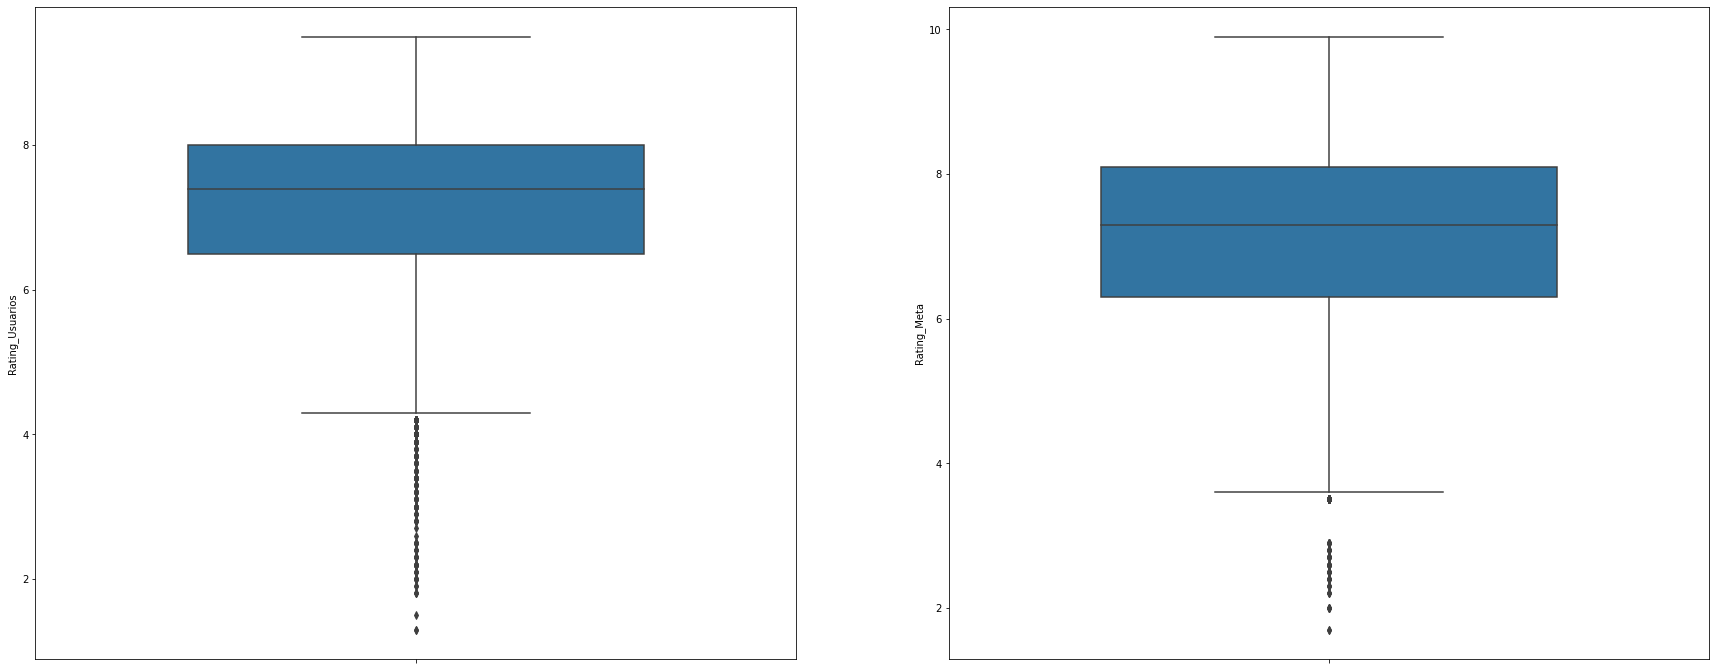

In [227]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(30,12))

sns.boxplot(data=df_rank_sales,y='Rating_Usuarios', width=0.6, ax=ax)
sns.boxplot(data=df_rank_sales,y='Rating_Meta', width=0.6, ax=ax2)

<AxesSubplot:ylabel='Rating_Meta'>

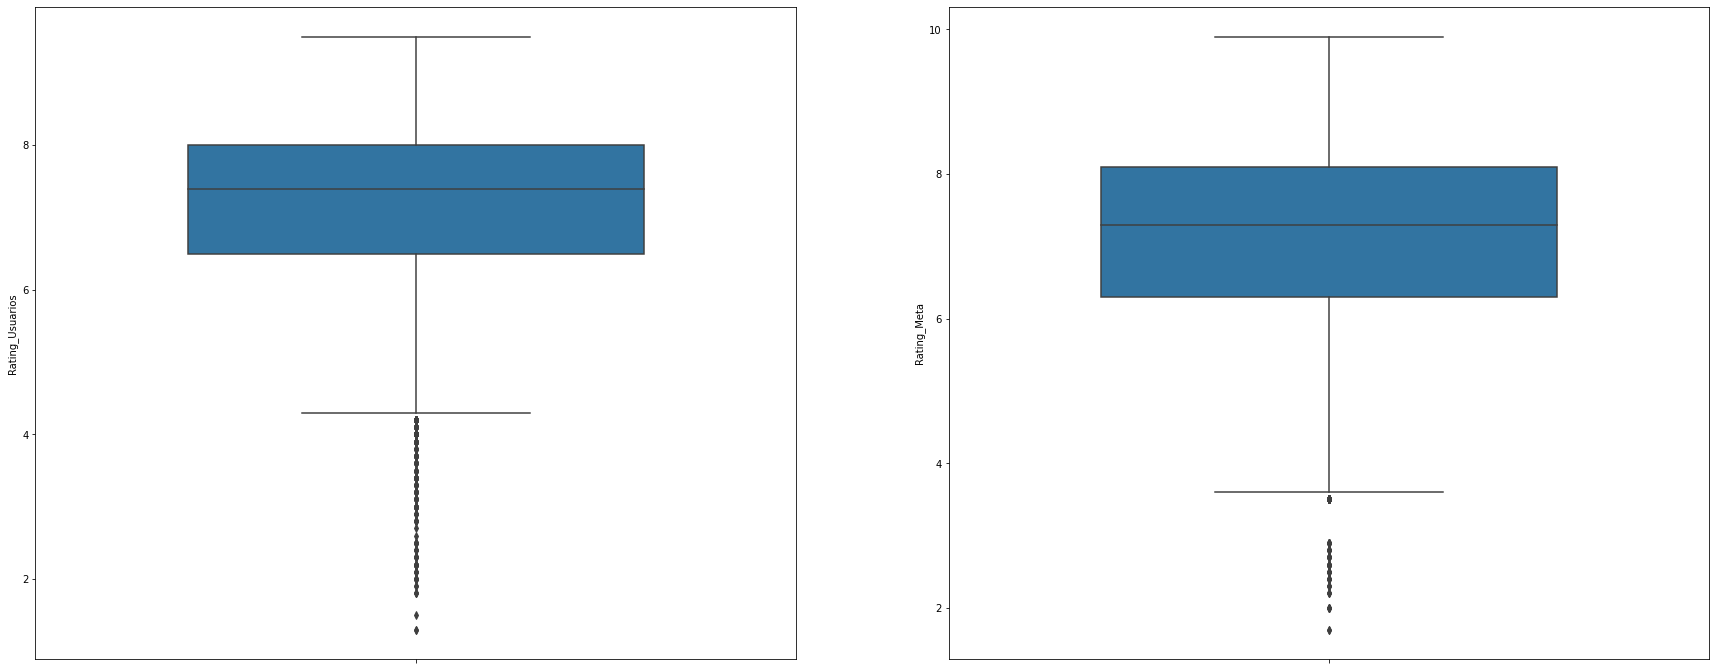

In [228]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(30,12))

sns.boxplot(data=df_rank_sales,y='Rating_Usuarios', width=0.6, ax=ax)
sns.boxplot(data=df_rank_sales,y='Rating_Meta', width=0.6, ax=ax2)

Como han variado las ventas de los videojuegos a lo largo de los años

paises especificos:

<AxesSubplot:title={'center':'Cantidad de juegos vendidos por año (1980 - 2016) (Especifico)'}, xlabel='Año', ylabel='Unidades vendidas (millones)'>

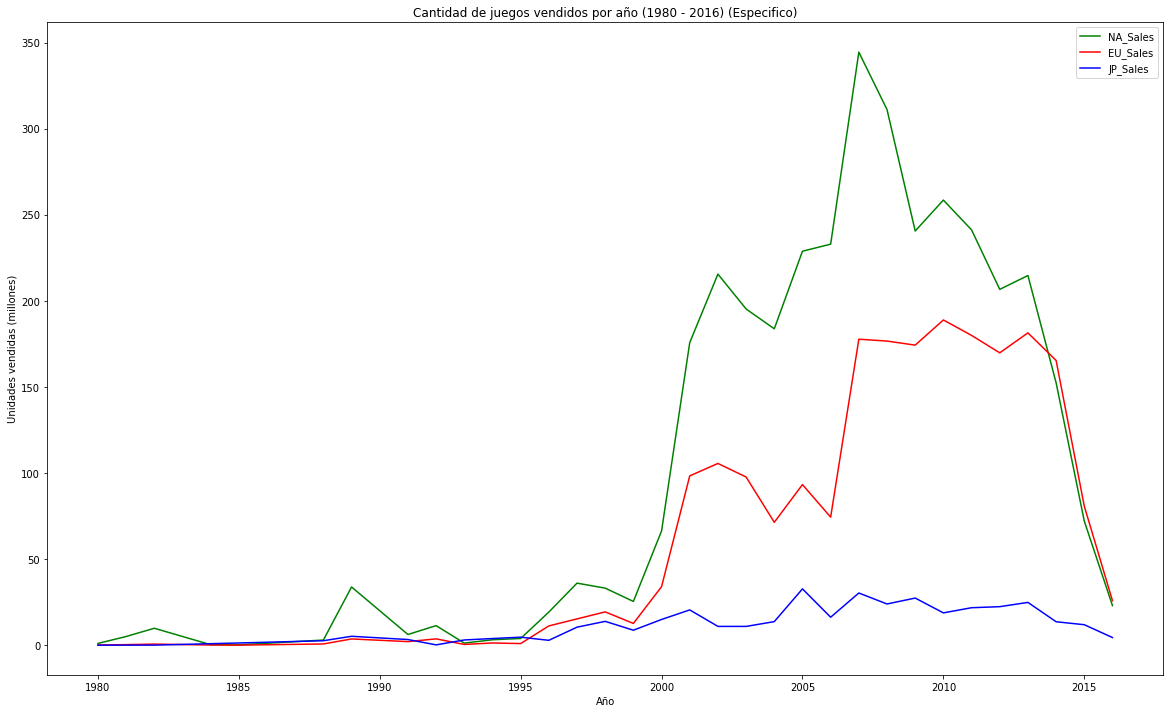

In [284]:
df_na = df_rank_sales.groupby(by="Year").agg({"NA_Sales":"sum"})
df_eu = df_rank_sales.groupby(by="Year").agg({"EU_Sales":"sum"})
df_jp = df_rank_sales.groupby(by="Year").agg({"JP_Sales":"sum"})


df_sales_years = df_rank_sales.groupby(by="Year").agg({"Global_Sales": "sum"})
fig, ax = plt.subplots(figsize=(20,12))
df_na.plot(ax = ax, xlabel="Año", ylabel = "Unidades vendidas (millones)", color="green")
df_eu.plot(ax = ax, xlabel="Año", ylabel = "Unidades vendidas (millones)", color="red")
df_jp.plot(ax = ax, xlabel="Año", ylabel = "Unidades vendidas (millones)", title= "Cantidad de juegos vendidos por año (1980 - 2016) (Especifico)", color="blue")

**CONCLUSIONES**

Global:

<AxesSubplot:title={'center':'Cantidad de juegos vendidos por año (1980 - 2016)'}, xlabel='Año', ylabel='Unidades vendidas (millones)'>

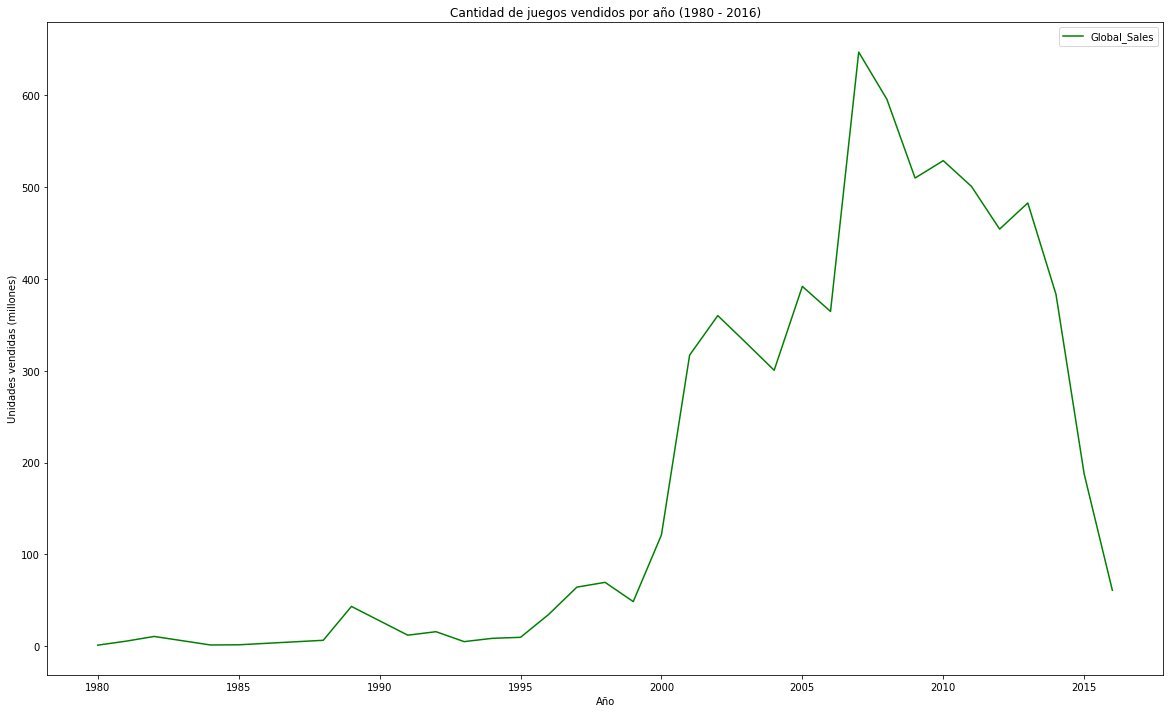

In [270]:
df_sales_years = df_rank_sales.groupby(by="Year").agg({"Global_Sales": "sum"})
fig, ax = plt.subplots(figsize=(20,12))
df_sales_years.plot(ax = ax, xlabel="Año", ylabel = "Unidades vendidas (millones)", title= "Cantidad de juegos vendidos por año (1980 - 2016)", color="green")

**CONCLUSIONES**

RATINGS POR GENERO

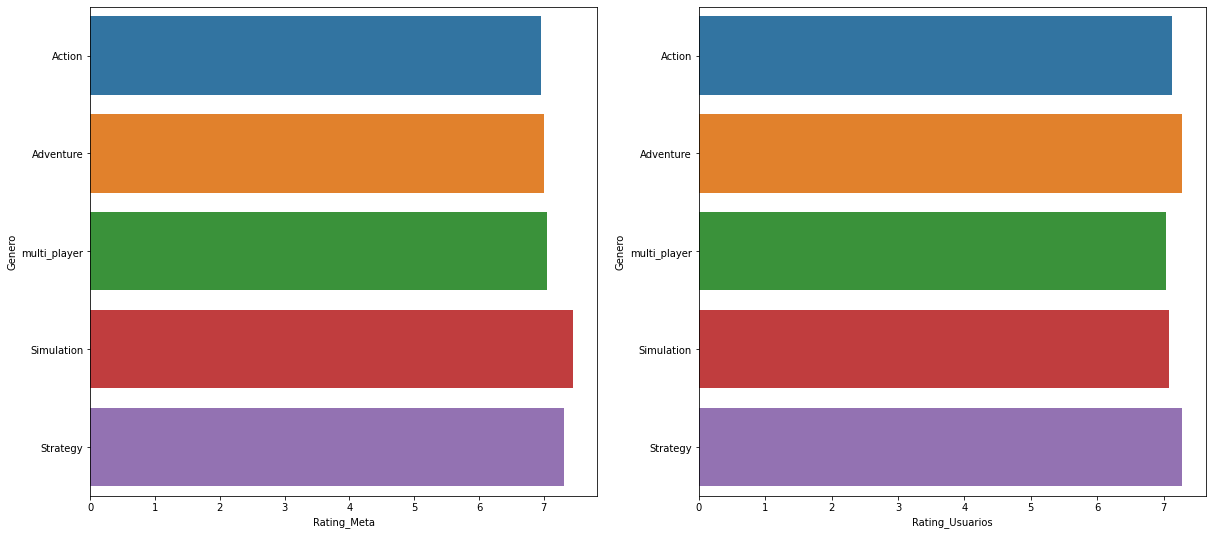

,Genero,Rating_Meta,Rating_Usuarios
0,Action,6.957676,7.130789
1,Adventure,7.004294,7.275460
2,multi_player,7.051941,7.041220
3,Simulation,7.454330,7.080026
4,Strategy,7.314362,7.278457


In [229]:
rank_genero = df_rank_sales.groupby(by="Genero", as_index=False).agg({"Rating_Meta":"mean", "Rating_Usuarios": "mean"})
fig, (ax, ax2) = plt.subplots(1,2, figsize=(20,9))
sns.barplot(x="Rating_Meta", y="Genero", data=rank_genero, ax=ax)
sns.barplot(x="Rating_Usuarios", y="Genero", data=rank_genero, ax=ax2)
plt.show()
rank_genero.head()

RATING POR PLATAFORMA

,Genero,Rating_Meta,Rating_Usuarios
0,Action,6.957676,7.130789
1,Adventure,7.004294,7.275460
2,multi_player,7.051941,7.041220
3,Simulation,7.454330,7.080026
4,Strategy,7.314362,7.278457


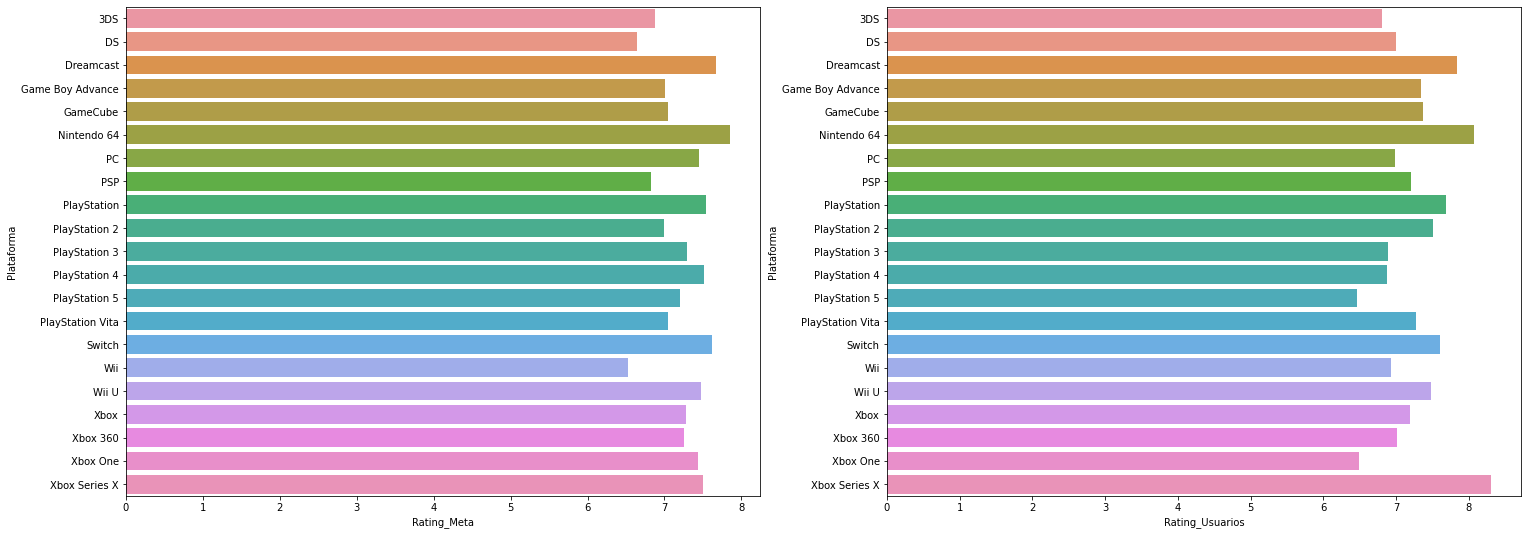

In [230]:
rank_platf = df_rank_sales.groupby(by="Plataforma", as_index=False).agg({"Rating_Meta":"mean", "Rating_Usuarios": "mean"})
fig, (ax, ax2) = plt.subplots(1,2, figsize=(25,9))
sns.barplot(x="Rating_Meta", y="Plataforma", data=rank_platf, ax=ax)
sns.barplot(x="Rating_Usuarios", y="Plataforma", data=rank_platf, ax=ax2)
rank_genero.head()

In [272]:
df_rank_sales.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,2009,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort,8.0,8.3,Wii,Nintendo,2009-07-26,Simulation,Wii Sports Resort is a collection of fun sport...,multi_player,E
1,1989,23.20,2.26,4.22,0.58,30.26,Tetris,8.0,7.3,PlayStation 3,Electronic Arts,2011-01-04,multi_player,The first Tetris game for the PlayStation 3 wi...,multi_player,E
2,1988,2.97,0.69,1.81,0.11,5.58,Tetris,8.0,7.3,PlayStation 3,Electronic Arts,2011-01-04,multi_player,The first Tetris game for the PlayStation 3 wi...,multi_player,E
3,2005,9.81,7.57,4.13,1.92,23.42,Mario Kart DS,9.1,8.7,DS,Nintendo,2005-11-14,Simulation,Race and battle with up to eight karts at once...,multi_player,E
4,2007,8.94,8.03,3.60,2.15,22.72,Wii Fit,8.0,7.7,Wii,Nintendo,2008-05-19,Simulation,The active-play phenomenon started by Wii Spor...,single_player,E
